In [14]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator



In [15]:
training_directory="dataset/Training"
validation_directory="dataset/Validation"
input_shape=(224,224,3)

In [16]:
training_data_generator=ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           vertical_flip= True,
                                           rotation_range=45,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           fill_mode="nearest")


validation_data_generator=ImageDataGenerator(rescale=1./255)

train_generator=training_data_generator.flow_from_directory(training_directory,
                                                           target_size=(224,224),
                                                           class_mode="categorical",
                                                           batch_size=64)

validation_generator=training_data_generator.flow_from_directory(validation_directory,
                                                           target_size=(224,224),
                                                           class_mode="categorical",
                                                           batch_size=16)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [17]:
import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def fireNet(input_shape):
    
    model=keras.models.Sequential([layers.Conv2D(96,(11,11),strides=(4,4),activation="relu",input_shape=input_shape),
                                   layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)),
                                   
                                   layers.Conv2D(256,(5,5),activation="relu"),
                                   layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)),
      
                                   layers.Conv2D(512,(3,3),activation="relu"),
                                   layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)),
                                   
                                   layers.Flatten(),
                                   
                                   layers.Dropout(0.3),
                                   layers.Dense(2048,activation="relu"),
                                   
                                   layers.Dropout(0.3),
                                   layers.Dense(1024,activation="relu"),
                                   
                                   layers.Dropout(0.3),
                                   layers.Dense(2,activation="softmax"),
                                   
                                  ])
    
    model.compile(loss="categorical_crossentropy",
                  optimizer=Adam(lr=1e-4),
                  metrics=["acc"])
    return model

In [18]:
model=fireNet(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 512)         1180160   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 512)       

In [19]:
history=model.fit(
                  train_generator,
                  steps_per_epoch=15,
                  epochs=50,
                  validation_data=validation_generator,
                  validation_steps=15)

Epoch 1/50
15/15 [==============================] - 143s 9s/step - loss: 0.5594 - acc: 0.6790 - val_loss: 0.4590 - val_acc: 0.7280
Epoch 2/50
15/15 [==============================] - 131s 9s/step - loss: 0.3462 - acc: 0.8493 - val_loss: 0.3383 - val_acc: 0.8787
Epoch 3/50
15/15 [==============================] - 145s 10s/step - loss: 0.3312 - acc: 0.8777 - val_loss: 0.3954 - val_acc: 0.8452
Epoch 4/50
15/15 [==============================] - 131s 9s/step - loss: 0.3225 - acc: 0.8734 - val_loss: 0.2764 - val_acc: 0.9079
Epoch 5/50
15/15 [==============================] - 135s 9s/step - loss: 0.2543 - acc: 0.9021 - val_loss: 0.2419 - val_acc: 0.9289
Epoch 6/50
15/15 [==============================] - 140s 9s/step - loss: 0.2412 - acc: 0.9017 - val_loss: 0.2359 - val_acc: 0.9205
Epoch 7/50
15/15 [==============================] - 128s 9s/step - loss: 0.2246 - acc: 0.9148 - val_loss: 0.2266 - val_acc: 0.9289
Epoch 8/50
15/15 [==============================] - 129s 9s/step - loss: 0.2078 - 

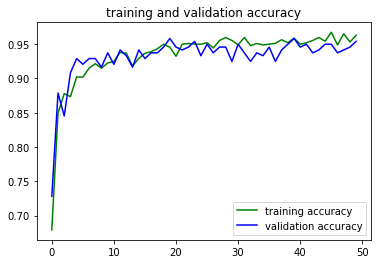

<Figure size 432x288 with 0 Axes>

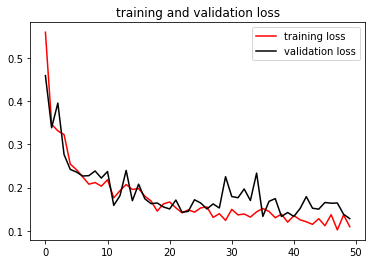

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt

acc=history.history["acc"]
val_acc=history.history["val_acc"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

epochs=range(0,50)

plt.plot(epochs,acc,"g",label="training accuracy")
plt.plot(epochs,val_acc,"b",label="validation accuracy")
plt.title("training and validation accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,"r",label="training loss")
plt.plot(epochs,val_loss,"black",label="validation loss")
plt.title("training and validation loss")
plt.legend(loc=0)
plt.figure()
plt.show()


In [27]:
model.save("models/fire_model.h5")

In [29]:
import cv2
import numpy as np
from keras.models import load_model

In [36]:
model=load_model("models/fire_model.h5")
path="test/test.jpg"

In [43]:
#Aşağıdaki kod blogu videolar üzerinde bu işlemi nasıl gerçekleştireceğimizi göstermekte

test_img=cv2.imread(path)

img=np.asarray(test_img)
img=cv2.resize(img,(224,224))

img=img/255

print(img.shape)
img=img.reshape(1,224,224,3)

predictions=model.predict(img)
pred=np.argmax(predictions[0])

probability = predictions[0][pred]
probabilty_="%{:2f}".format(probability*100)

if pred==1:
    label="Fire"
else:
    label="Neutural"
    
    
font=cv2.FONT_HERSHEY_SIMPLEX
color=(0,255,0)
cv2.putText(test_img,label,(35,60),font,1,color,2)
cv2.putText(test_img,probabilty_,(35,100),font,1,color,2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(224, 224, 3)
1/1 [==============================] - 0s 97ms/step


In [ ]:
# Aşağıdaki kod bloğu videolar üzerinde bu işlemi nasıl gerçekleştireceğimizi göstermekte

video_path="test/test.mp4"
cap=cv2.VideoCapture(video_path)

while True:
    ret,frame=cap.read()
    img=np.asarray(frame)
    img=cv2.resize(img,(224,224))

    img=img/255

    print(img.shape)
    img=img.reshape(1,224,224,3)

    classes=model.predict(img)
    pred=np.argmax(predictions[0])

    probability = predictions[0][pred]
    probabilty_="%{:2f}".format(probability*100)

    if pred==1:
        label="Fire"
    else:
        label="Neutural"
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    color=(0,255,0)
    cv2.putText(frame,label,(35,60),font,1,color,2)
    cv2.putText(frame,probabilty_,(35,100),font,1,color,2)

    cv2.imshow("Prediction", test_img)
    
    if cv2.waitKey(10) & 0xff ==ord("q"):
        break 
        
    cv2.destroyAllWindows()











(224, 224, 3)
1/1 [==============================] - 0s 67ms/step
(224, 224, 3)
1/1 [==============================] - 0s 77ms/step
(224, 224, 3)
1/1 [==============================] - 0s 85ms/step
(224, 224, 3)
1/1 [==============================] - 0s 100ms/step
(224, 224, 3)
1/1 [==============================] - 0s 107ms/step
(224, 224, 3)
1/1 [==============================] - 0s 97ms/step
(224, 224, 3)
1/1 [==============================] - 0s 59ms/step
(224, 224, 3)
1/1 [==============================] - 0s 117ms/step
(224, 224, 3)
1/1 [==============================] - 0s 79ms/step
(224, 224, 3)
1/1 [==============================] - 0s 111ms/step
(224, 224, 3)
1/1 [==============================] - 0s 100ms/step
(224, 224, 3)
1/1 [==============================] - 0s 70ms/step
(224, 224, 3)
1/1 [==============================] - 0s 80ms/step
(224, 224, 3)
1/1 [==============================] - 0s 76ms/step
(224, 224, 3)
1/1 [==============================] - 0s 85ms/step
(224,